<a href="https://colab.research.google.com/github/JavierCarrillo12/Computacion-visual-jtorresle-jugomezra-dagarzonmo-jacarrillo/blob/main/Talleres/TallerPractico1_Calibracion/notebook_calibracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import os
import cv2
import numpy as np

# 1) Rutas de origen y destino en Google Drive
src_folder = '/content/drive/MyDrive/Colab Notebooks/Computación visual/Calibración de Cámaras y Corrección de Distorsión con OpenCV/imagenes_originales'
dst_folder = '/content/drive/MyDrive/Colab Notebooks/Computación visual/Calibración de Cámaras y Corrección de Distorsión con OpenCV/imagenes_distorsionadas'

# Crear carpeta de destino si no existe
os.makedirs(dst_folder, exist_ok=True)

# 2) Lista de nombres de archivo (ajusta si cambian)
filenames = [
    '20250517_115609.jpg','20250517_115611.jpg','20250517_115613.jpg',
    '20250517_115615.jpg','20250517_115618.jpg','20250517_115622.jpg',
    '20250517_115625.jpg','20250517_115627.jpg','20250517_115634.jpg',
    '20250517_115636.jpg','20250517_115639.jpg'
]

# 3) Parámetros de distorsión (coeficientes ficticios para efecto visible)
#    k1, k2 controlan la deformación radial (>0: barril, <0: almohadilla)
#    p1, p2 controlan la distorsión tangencial
#    k3 tercer coef radial
dist_coeffs = np.array([0.5, 0.2, 0.0, 0.0, 0.0], dtype=np.float32)

for fname in filenames:
    # Leer imagen original
    src_path = os.path.join(src_folder, fname)
    img = cv2.imread(src_path)
    if img is None:
        print(f"⚠️ No se pudo leer {src_path}")
        continue

    h, w = img.shape[:2]
    # Matriz intrínseca simulada (focal = ancho, centro = mitad)
    K = np.array([[w,   0, w/2],
                  [ 0, w,   h/2],
                  [ 0,   0,     1]], dtype=np.float32)

    # 4) Generar mapas de undistort/remap
    map1, map2 = cv2.initUndistortRectifyMap(
        K, dist_coeffs, None, K, (w, h), cv2.CV_32FC1
    )
    # 5) Aplicar remape a la imagen (distorsionada)
    distorted = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR)

    # 6) Guardar copia distorsionada
    dst_path = os.path.join(dst_folder, fname)
    cv2.imwrite(dst_path, distorted)

print("✅ Distorsión aplicada y archivos guardados en:", dst_folder)


✅ Distorsión aplicada y archivos guardados en: /content/drive/MyDrive/Colab Notebooks/Computación visual/Calibración de Cámaras y Corrección de Distorsión con OpenCV/imagenes_distorsionadas


✅ Esquinas guardadas en /content/drive/MyDrive/Colab Notebooks/Computación visual/Calibración de Cámaras y Corrección de Distorsión con OpenCV/esquinas_detectadas/20250517_115609.jpg


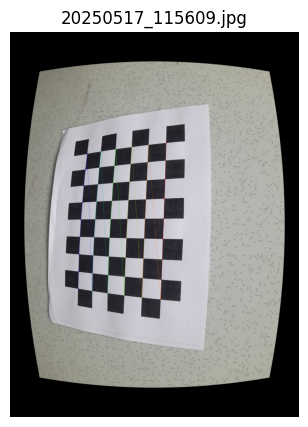

✅ Esquinas guardadas en /content/drive/MyDrive/Colab Notebooks/Computación visual/Calibración de Cámaras y Corrección de Distorsión con OpenCV/esquinas_detectadas/20250517_115611.jpg


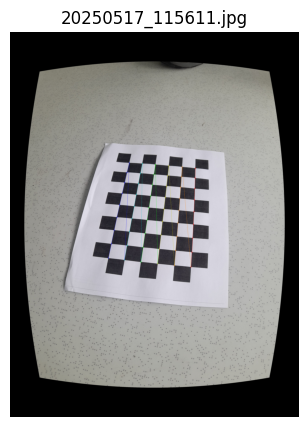

✅ Esquinas guardadas en /content/drive/MyDrive/Colab Notebooks/Computación visual/Calibración de Cámaras y Corrección de Distorsión con OpenCV/esquinas_detectadas/20250517_115613.jpg


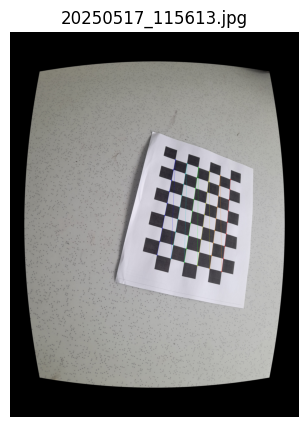

✅ Esquinas guardadas en /content/drive/MyDrive/Colab Notebooks/Computación visual/Calibración de Cámaras y Corrección de Distorsión con OpenCV/esquinas_detectadas/20250517_115615.jpg


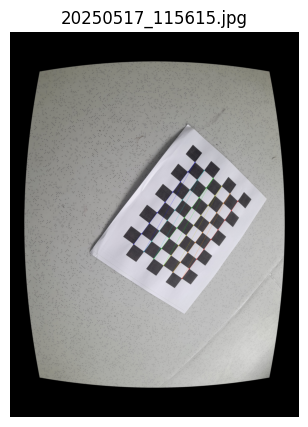

✅ Esquinas guardadas en /content/drive/MyDrive/Colab Notebooks/Computación visual/Calibración de Cámaras y Corrección de Distorsión con OpenCV/esquinas_detectadas/20250517_115618.jpg


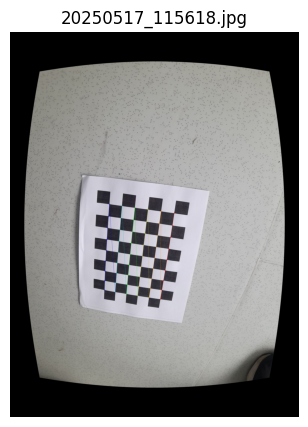

✅ Esquinas guardadas en /content/drive/MyDrive/Colab Notebooks/Computación visual/Calibración de Cámaras y Corrección de Distorsión con OpenCV/esquinas_detectadas/20250517_115622.jpg


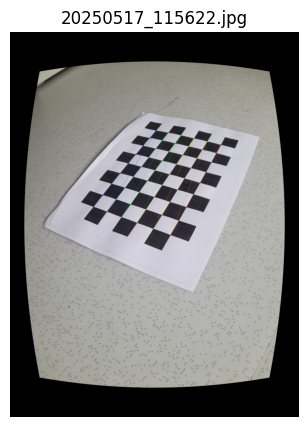

✅ Esquinas guardadas en /content/drive/MyDrive/Colab Notebooks/Computación visual/Calibración de Cámaras y Corrección de Distorsión con OpenCV/esquinas_detectadas/20250517_115625.jpg


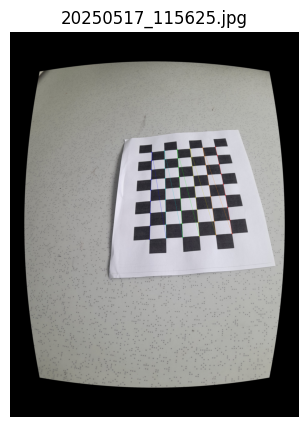

✅ Esquinas guardadas en /content/drive/MyDrive/Colab Notebooks/Computación visual/Calibración de Cámaras y Corrección de Distorsión con OpenCV/esquinas_detectadas/20250517_115627.jpg


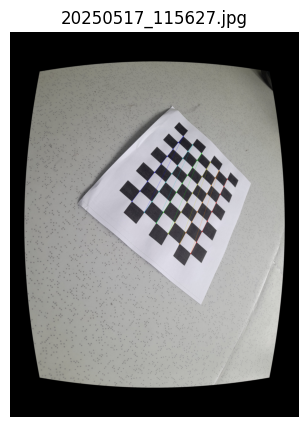

✅ Esquinas guardadas en /content/drive/MyDrive/Colab Notebooks/Computación visual/Calibración de Cámaras y Corrección de Distorsión con OpenCV/esquinas_detectadas/20250517_115634.jpg


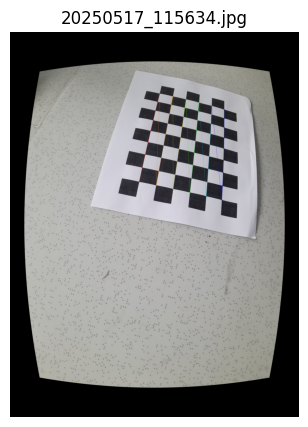

✅ Esquinas guardadas en /content/drive/MyDrive/Colab Notebooks/Computación visual/Calibración de Cámaras y Corrección de Distorsión con OpenCV/esquinas_detectadas/20250517_115636.jpg


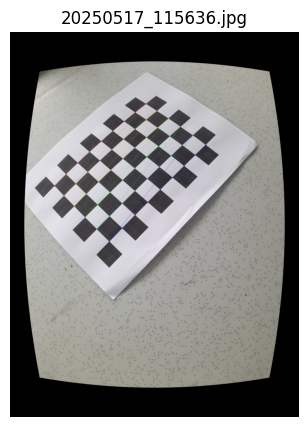

✅ Esquinas guardadas en /content/drive/MyDrive/Colab Notebooks/Computación visual/Calibración de Cámaras y Corrección de Distorsión con OpenCV/esquinas_detectadas/20250517_115639.jpg


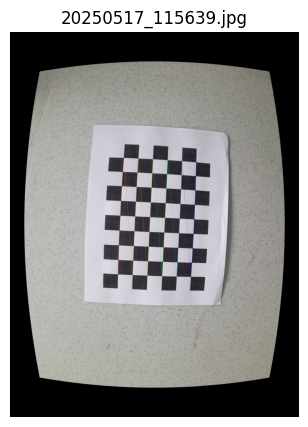

In [14]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carpeta base de tu proyecto (ajusta si tu ruta varía)
base = '/content/drive/MyDrive/Colab Notebooks/Computación visual/Calibración de Cámaras y Corrección de Distorsión con OpenCV'

distorted_folder = os.path.join(base, 'imagenes_distorsionadas')
output_folder    = os.path.join(base, 'esquinas_detectadas')
os.makedirs(output_folder, exist_ok=True)

# 1) Parámetros del tablero de ajedrez: (número de esquinas internas en columnas, filas)
pattern_size = (9, 6)  # ← Cámbialo a tu configuración real

# 2) Criterios de refinamiento subpíxel
criteria = (cv2.TermCriteria_EPS + cv2.TermCriteria_MAX_ITER, 30, 0.001)

# 3) Iterar y procesar cada JPG de la carpeta distorsionada
for img_path in sorted(glob.glob(os.path.join(distorted_folder, '*.jpg'))):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 4) Detección inicial de esquinas
    ret, corners = cv2.findChessboardCorners(gray, pattern_size, None)
    if not ret:
        print(f"❌ Patrón NO detectado en {os.path.basename(img_path)} → descartada")
        continue

    # 5) Refinamiento subpíxel
    corners_refined = cv2.cornerSubPix(
        gray, corners,
        winSize=(11, 11),
        zeroZone=(-1, -1),
        criteria=criteria
    )

    # 6) Dibujar las esquinas detectadas
    vis = img.copy()
    cv2.drawChessboardCorners(vis, pattern_size, corners_refined, True)

    # 7) Guardar la imagen resultante
    out_path = os.path.join(output_folder, os.path.basename(img_path))
    cv2.imwrite(out_path, vis)
    print(f"✅ Esquinas guardadas en {out_path}")

    # 8) Visualizar en línea con Matplotlib
    vis_rgb = cv2.cvtColor(vis, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5,5))
    plt.imshow(vis_rgb)
    plt.title(os.path.basename(img_path))
    plt.axis('off')
    plt.show()


In [15]:
import os
import glob
import cv2
import numpy as np

# Carpeta con las imágenes distorsionadas
base = '/content/drive/MyDrive/Colab Notebooks/Computación visual/Calibración de Cámaras y Corrección de Distorsión con OpenCV'
img_folder = os.path.join(base, 'imagenes_distorsionadas')

# Parámetros del tablero de ajedrez (esquinas internas)
pattern_size = (9, 6)  # (columnas, filas)
square_size = 1.0      # tamaño de cada cuadrado

# Preparar puntos de objeto 3D
objp = np.zeros((pattern_size[1]*pattern_size[0], 3), dtype=np.float32)
objp[:,:2] = np.indices(pattern_size).T.reshape(-1, 2) * square_size

objpoints = []  # lista de puntos 3D
imgpoints = []  # lista de puntos 2D
image_shape = None  # para almacenar dimensiones de la imagen

criteria = (cv2.TermCriteria_EPS + cv2.TermCriteria_MAX_ITER, 30, 0.001)

# Detectar y refinar esquinas
for img_path in sorted(glob.glob(os.path.join(img_folder, '*.jpg'))):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if image_shape is None:
        image_shape = gray.shape[::-1]

    ret, corners = cv2.findChessboardCorners(gray, pattern_size, None)
    if not ret:
        print(f"❌ Patrón no detectado en {os.path.basename(img_path)}")
        continue

    corners_refined = cv2.cornerSubPix(
        gray, corners, winSize=(11,11),
        zeroZone=(-1,-1), criteria=criteria
    )

    objpoints.append(objp)
    imgpoints.append(corners_refined)

n_imgs = len(objpoints)
print(f"\nImágenes válidas para calibración: {n_imgs} de {len(glob.glob(os.path.join(img_folder, '*.jpg')))}")

if n_imgs < 1:
    print("❌ No hay suficientes imágenes para calibrar.")
else:
    # Calibrar cámara
    ret, camera_matrix, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(
        objpoints, imgpoints, image_shape, None, None
    )

    # Calcular error medio de reproyección
    total_error = 0
    for i in range(n_imgs):
        imgpoints_proj, _ = cv2.projectPoints(
            objpoints[i], rvecs[i], tvecs[i],
            camera_matrix, dist_coeffs
        )
        error = cv2.norm(imgpoints[i], imgpoints_proj, cv2.NORM_L2) / len(imgpoints_proj)
        total_error += error
    mean_error = total_error / n_imgs

    # Mostrar resultados
    print("\n--- Resultados de la Calibración ---")
    print("Matriz de cámara (intrínseca):")
    print(camera_matrix)
    print("\nCoeficientes de distorsión [k1, k2, p1, p2, k3]:")
    print(dist_coeffs.ravel())
    print(f"\nError medio de reproyección: {mean_error:.4f} píxeles")



Imágenes válidas para calibración: 11 de 11

--- Resultados de la Calibración ---
Matriz de cámara (intrínseca):
[[2.97909004e+03 0.00000000e+00 1.43683855e+03]
 [0.00000000e+00 2.95872780e+03 1.95912282e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Coeficientes de distorsión [k1, k2, p1, p2, k3]:
[-3.79791343e-01 -1.94604580e-01  9.53529851e-04  6.60794656e-03
  9.75130347e-01]

Error medio de reproyección: 0.1174 píxeles


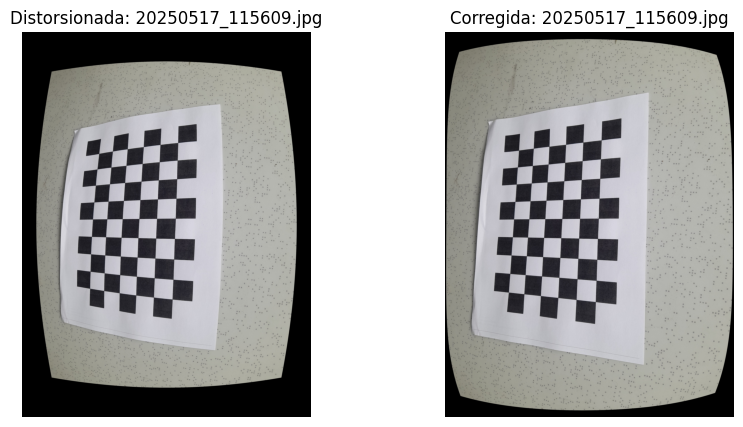

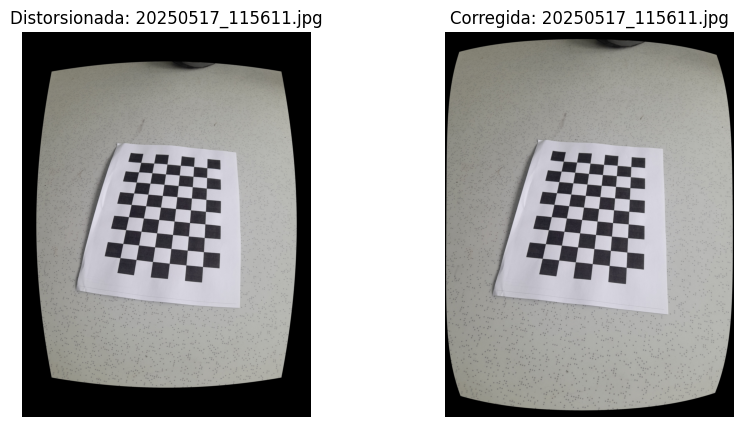

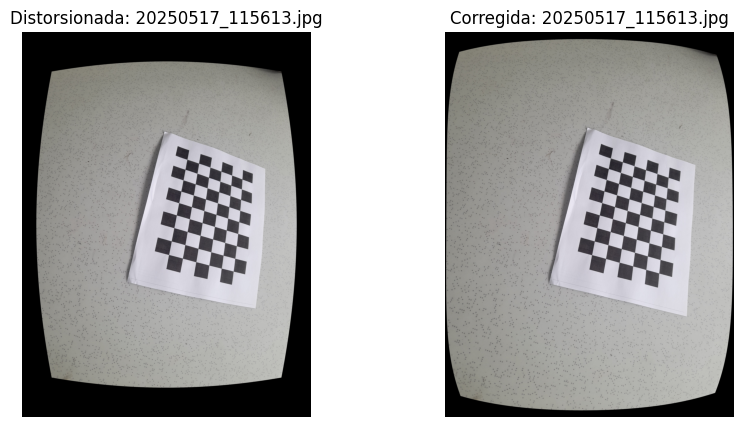

In [17]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

base = '/content/drive/MyDrive/Colab Notebooks/Computación visual/Calibración de Cámaras y Corrección de Distorsión con OpenCV'

# Directorios (ajusta a tu entorno si no están en el cwd)
distorted_folder = os.path.join(base, 'imagenes_distorsionadas')
corrected_folder = os.path.join(base, 'imagenes_corregidas')

# Crear carpeta de destino en la ruta actual
os.makedirs(corrected_folder, exist_ok=True)

# Se asume que 'camera_matrix' y 'dist_coeffs' ya están definidos en el entorno
# Si no, define aquí con tus valores obtenidos al calibrar

# Obtener rutas de imágenes distorsionadas
image_paths = sorted(glob.glob(os.path.join(distorted_folder, '*.jpg')))

# Procesar las primeras 3 imágenes
for img_path in image_paths[:3]:
    img = cv2.imread(img_path)
    if img is None:
        print(f"❌ No se pudo leer {img_path}")
        continue

    # Aplicar corrección de distorsión
    undistorted = cv2.undistort(img, camera_matrix, dist_coeffs, None, camera_matrix)

    # Guardar versión corregida
    fname = os.path.basename(img_path)
    save_path = os.path.join(corrected_folder, fname)
    cv2.imwrite(save_path, undistorted)

    # Visualización comparativa
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    und_rgb = cv2.cvtColor(undistorted, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img_rgb)
    plt.title(f'Distorsionada: {fname}')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(und_rgb)
    plt.title(f'Corregida: {fname}')
    plt.axis('off')
    plt.show()
